# Comparing numerical data across groups

## Python setup

In [7]:
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", color_codes=True)

# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
my_colors = [blue, orange]

## Import data

In [8]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "county.csv"

df = pd.read_csv(ROOT + DATA)

# Select only relevant variables
data_selection = ["state", "name", "pop_change", 
                  "population_change", "median_hh_income", "metro"]
df = df[data_selection]

# Data transformations
df.rename(columns={'population_change': 'change'}, inplace=True)
df['change'] = df['change'].astype("category")

df.head()

,state,name,pop_change,change,median_hh_income,metro
0,Alabama,Autauga County,1.48,gain,55317.0,yes
1,Alabama,Baldwin County,9.19,gain,52562.0,yes
2,Alabama,Barbour County,-6.22,no gain,33368.0,no
3,Alabama,Bibb County,0.73,gain,43404.0,yes
4,Alabama,Blount County,0.68,gain,47412.0,yes


## Histogram for two groups

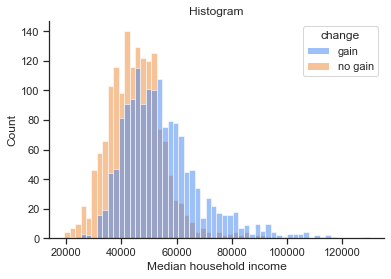

In [9]:
sns.histplot(data=df, x="median_hh_income", hue="change", palette=my_colors)

plt.title("Histogram")
plt.xlabel("Median household income")
sns.despine()

## Side-by-side box plot

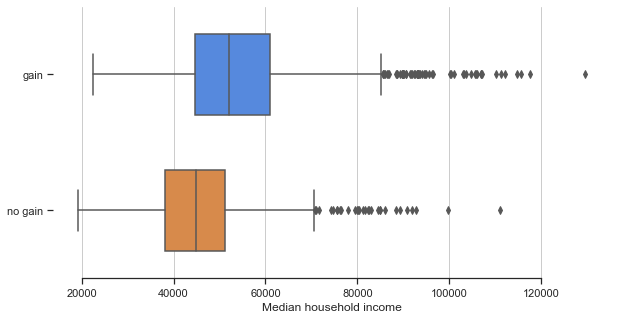

In [10]:
# Initialize the figure
fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(y="change", x="median_hh_income", palette=my_colors, width=.6, data=df)
            
ax.xaxis.grid(True)
ax.set(xlabel="Median household income", ylabel="")
sns.despine(trim=True, left=True)

## Faceting

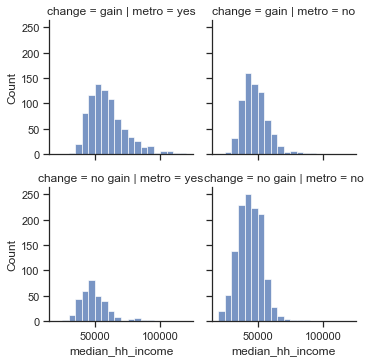

In [11]:
g = sns.FacetGrid(df, col="metro",  row="change", height=2.6)
g.map_dataframe(sns.histplot, x="median_hh_income", binwidth=5000, binrange=(20000, 120000));

## Pair plots

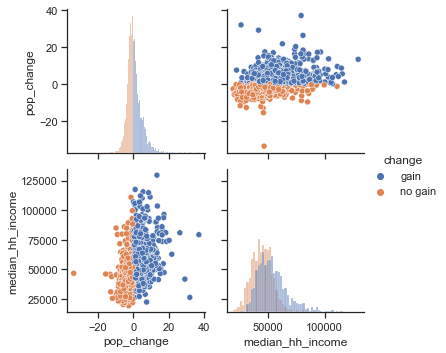

In [12]:
g = sns.PairGrid(df, hue="change")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

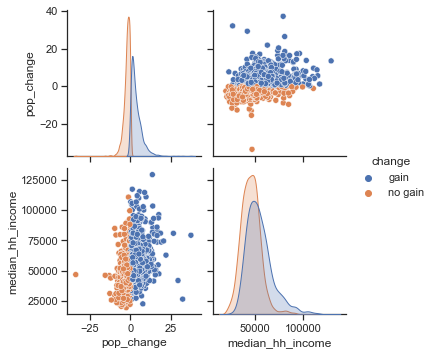

In [13]:
sns.pairplot(df, hue="change");

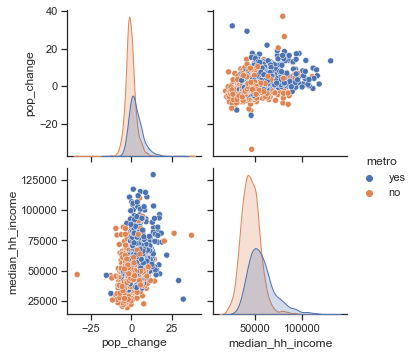

In [14]:
sns.pairplot(df, hue="metro");

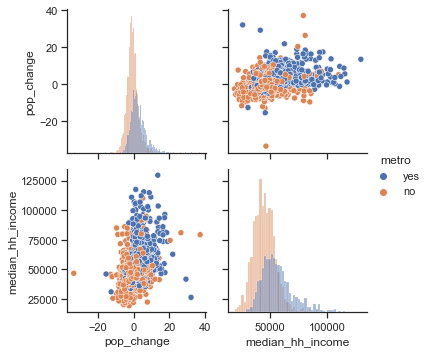

In [15]:
g = sns.PairGrid(df, hue="metro")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();